In [1]:
sys.path.append('../')
%load_ext autoreload
%autoreload 2

from parameters import *
from SCN_model import SCN
from learning_rules import *
from inputs import ImagePatchInput
import plotting_functions
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def train(model):
    loss = model()
    spike_count = np.count_nonzero(model.populations[0].spiketrains)
    return loss, spike_count

def test(model, params):
    loss = 0
    spike_count = 0
    for i in range(params.test_its):
        loss += model(learning=False) / params.test_its
        spike_count += np.count_nonzero(model.populations[0].spiketrains) / params.test_its
    return loss, spike_count

In [3]:
p_dim = 12 #patch size

params = patches_params()
T = params.duration
N = params.n_neurons

In [4]:
inp = ImagePatchInput('input', path='../data/test_images/', patch_size=(p_dim, p_dim), r=200)
net = SCN(params, inp)
pop=net.populations[0]
w_init = pop.fastConnections['input'].weights

av_loss = []

for i in range(params.train_its):
    print('iteration', i)
    _, s = train(net)
    # print('spike count:', s)

    if i % params.test_freq == 0 and i != 0:    
        print('testing model')
        av_loss.append(test(net, params))
        print('LOSS =', av_loss[-1])


tion 1202
iteration 1203
iteration 1204
iteration 1205
iteration 1206
iteration 1207
iteration 1208
iteration 1209
iteration 1210
iteration 1211
iteration 1212
iteration 1213
iteration 1214
iteration 1215
iteration 1216
iteration 1217
iteration 1218
iteration 1219
iteration 1220
iteration 1221
iteration 1222
iteration 1223
iteration 1224
iteration 1225
iteration 1226
iteration 1227
iteration 1228
iteration 1229
iteration 1230
iteration 1231
iteration 1232
iteration 1233
iteration 1234
iteration 1235
iteration 1236
iteration 1237
iteration 1238
iteration 1239
iteration 1240
iteration 1241
iteration 1242
iteration 1243
iteration 1244
iteration 1245
iteration 1246
iteration 1247
iteration 1248
iteration 1249
iteration 1250
iteration 1251
iteration 1252
iteration 1253
iteration 1254
iteration 1255
iteration 1256
iteration 1257
iteration 1258
iteration 1259
iteration 1260
iteration 1261
iteration 1262
iteration 1263
iteration 1264
iteration 1265
iteration 1266
iteration 1267
iteration 1268


KeyboardInterrupt: 

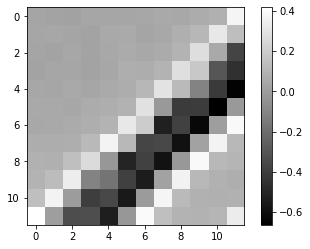

In [5]:
plt.imshow(np.reshape(inp.I[:,0], (p_dim, p_dim)), cmap='gray')# print(pop.fastConnections['input'].weights)
plt.colorbar()

Max weight 1d: 0.04155450357471875
Nb spikes: 73
Max Voltage reached: 0.006710449405399252
Threshold voltage: [0.00505]


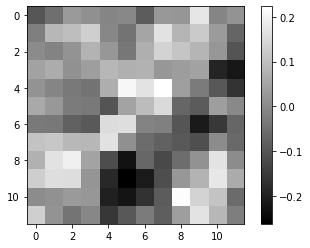

In [12]:
print('Max weight 1d:', np.max(abs(pop.fastConnections['input'].weights)))
print('Nb spikes:', np.count_nonzero(pop.spiketrains))
# print('idx spiked:', np.where(pop.spiketrains==1))
print('Max Voltage reached:', np.max(pop.Vm))
print('Threshold voltage:', pop.Vt[0])

plt.figure()
# plt.imshow(np.reshape(np.mean(pop.output[:,-100:], axis=1), (p_dim, p_dim)), cmap='gray')
plt.imshow(np.reshape(np.mean(pop.output[:,[150]], axis=1), (p_dim, p_dim)), cmap='gray')

plt.colorbar()


[[ 2.31121627e-04  4.59932037e-04  6.86454344e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.55244911e-04  3.08937372e-04  4.61092909e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 7.16800385e-05  1.42643277e-04  2.12896882e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.50293837e-04  4.98084736e-04  7.43397725e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.12421986e-04 -4.22719753e-04 -6.30914542e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.00075057e-04  1.99149363e-04  2.97232926e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


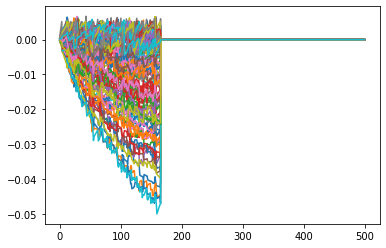

In [14]:
t = np.arange(0, params.duration, params.timestep)
plt.figure()
print(pop.Vm)
for Vm in pop.Vm:
    plt.plot(t, Vm)
plt.show()

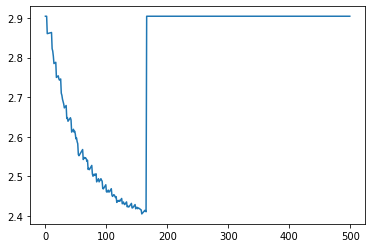

In [15]:
# plt.figure()
# test_ticks = np.arange(0, params.train_its, params.test_freq)
# plt.plot(test_ticks, np.array(av_loss))
plt.figure()
stim_loss = np.linalg.norm((pop.output - inp.x), axis=0)
plt.plot(t, stim_loss)

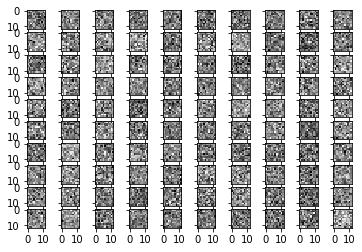

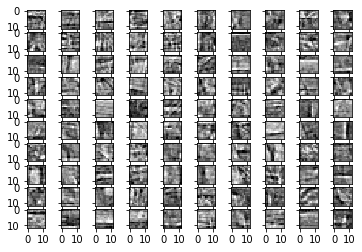

In [16]:
w = pop.fastConnections['input'].weights
n = params.n_neurons
scale = params.weight_scale

fig, axes = plt.subplots(10,10)

for i, ax in enumerate(axes.flatten()):
    if i < n:
        ax.imshow(np.reshape(w_init[:,i], (p_dim, p_dim)), cmap='gray')
        ax.label_outer()

fig, axes = plt.subplots(10,10)

for i, ax in enumerate(axes.flatten()):
    if i < n:
        ax.imshow(np.reshape(w[:,i], (p_dim, p_dim)), cmap='gray')
        ax.label_outer()